In [4]:
import psrchive, glob, os
import matplotlib.pyplot as plt; import numpy as np
import matplotlib
import matplotlib.ticker as ticker
#import matplotlib.gridspec as gridspec
#matplotlib.use('nbagg')
#%matplotlib nbagg
import warnings
warnings.filterwarnings('ignore')

from scipy.optimize import curve_fit
from scipy.signal import argrelmin, argrelmax


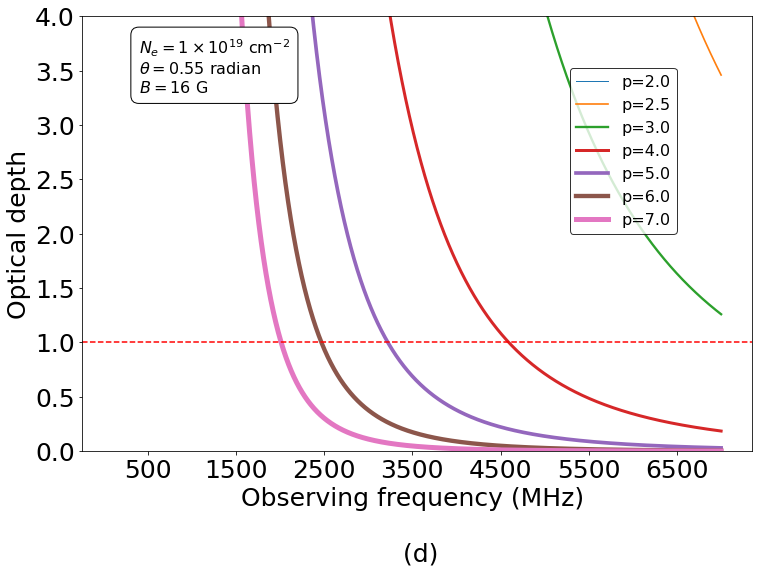

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import math
from multiprocessing import Pool, cpu_count

def model_f(args):
    freq, theta, p, Ne = args
    charge = 4.8032 * 10**(-10)
    lightspeed = 2.99792458 * 10**10
    mass = 9.1094 * 10**(-28)
    m = freq / (44 * 10**6)  # corresponds to B=16 Gauss
    L = 2.3 * 6.957e+10 
    q = (3 * p + 2) / 12
    r = (3 * p + 22) / 12
    a = math.gamma(q)
    b = math.gamma(r)
    c = (((3 ** ((p + 1) / 2)) * a * b) / 4)
    d = math.sin(theta)
    t = (d / m) ** ((p + 2) / 2)
    no = (Ne / L) * 0.01
    opticaldepth = c * t * ((no * (charge ** 2) * L) / (mass * lightspeed * freq))
    return opticaldepth

def compute_model_f(params_list):
    num_cores = cpu_count()  # Get the number of available cores
    with Pool(processes=num_cores) as pool:
        results = pool.map(model_f, params_list, chunksize=1)
    return results

if __name__ == "__main__":
    freq = np.arange(100 * 10**6, 7000 * 10**6, 500)
    theta = 1.5
    Ne = 1 * 10**19
    params_list = [(freq, theta, p, Ne) for p in [2.0,2.5, 3.0, 4.0, 5.0, 6.0, 7.0]]

    results = compute_model_f(params_list)

    fig, axp = plt.subplots(figsize=(12, 8))
    axp.set_xlabel("Observing frequency (MHz) \n \n (d)", fontsize=25)
    #axp.set_xlabel("(d)", fontsize=15, labelpad=20)
    axp.set_ylabel("Optical depth", fontsize=25)
    axp.tick_params(axis='both', labelsize=25)

    labels = [f'p={p:.1f}' for p in [2.0,2.5, 3.0, 4.0, 5.0, 6.0, 7.0]]
   
    max_linewidth = 5  # Maximum line width for the thickest line
    min_linewidth = 1  # Minimum line width for the thinnest line
    linewidths = np.linspace(min_linewidth, max_linewidth, len(params_list))  # Line thicknesses

    for result, label, lw in zip(results, labels, linewidths):
        axp.plot(freq / 10**6, result, label=label, linewidth=lw)


    axp.axhline(y=1, color='r', linestyle='dashed')
    axp.set_ylim(0, 4)
    axp.text(
    400, 3.3,
    r"$N_e = 1 \times 10^{19}\ \mathrm{cm}^{-2}$" "\n" r"$\theta = 0.55\ \mathrm{radian}$" "\n" r"$B = 16\ \mathrm{G}$",
    fontsize=16,
    color='black',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)
    axp.set_xticks([500,1500,2500,3500,4500,5500,6500])
    leg = axp.legend(loc='upper right', fontsize=16, bbox_to_anchor=(0.9,0.9))
    leg.get_frame().set_linewidth(1.0)
    leg.get_frame().set_edgecolor('black')

    plt.show()


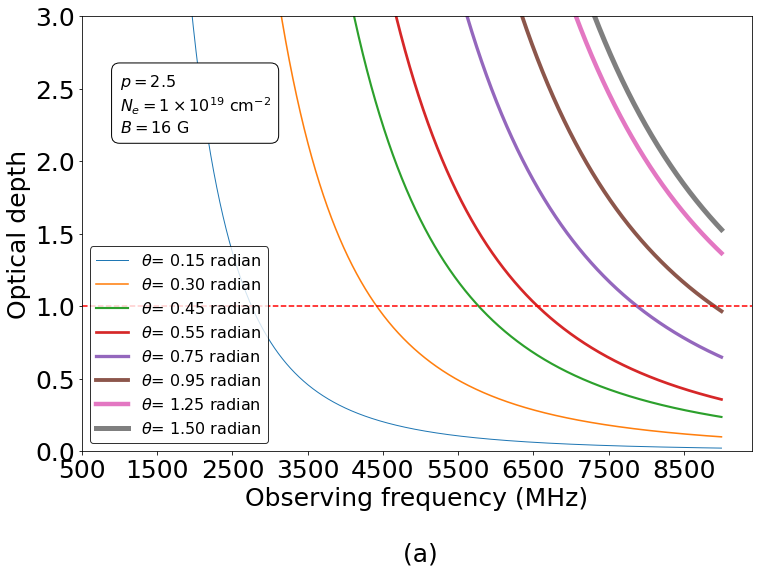

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
from multiprocessing import Pool, cpu_count

def model_f(args):
    freq, theta, p, Ne = args
    charge = 4.8032 * 10**(-10)
    lightspeed = 2.99792458 * 10**10
    mass = 9.1094 * 10**(-28)
    m = freq / (44 * 10**6)  # corresponds to B=16 Gauss
    L = 2.3 * 6.957e+10 
    q = (3 * p + 2) / 12
    r = (3 * p + 22) / 12
    a = math.gamma(q)
    b = math.gamma(r)
    c = (((3 ** ((p + 1) / 2)) * a * b) / 4)
    d = math.sin(theta)
    t = (d / m) ** ((p + 2) / 2)
    no = (Ne / L) * 0.01
    opticaldepth = c * t * ((no * (charge ** 2) * L) / (mass * lightspeed * freq))
    return opticaldepth

def compute_model_f(params_list):
    num_cores = cpu_count()  # Get the number of available cores
    with Pool(processes=num_cores) as pool:
        results = pool.map(model_f, params_list, chunksize=1)
    return results

if __name__ == "__main__":
    freq = np.arange(1000 * 10**6, 9000 * 10**6, 500)
    params_list = [
        (freq, 0.15, 2.5, 1 * 10**19),
        (freq, 0.30, 2.5, 1 * 10**19),
        (freq, 0.45, 2.5, 1 * 10**19),
        (freq, 0.55, 2.5, 1 * 10**19),
        (freq, 0.75, 2.5, 1 * 10**19),
        (freq, 0.95, 2.5, 1 * 10**19),
        (freq, 1.25, 2.5, 1 * 10**19),
        (freq, 1.50, 2.5, 1 * 10**19)
    ]

    results = compute_model_f(params_list)

    fig, axt = plt.subplots(figsize=(12, 8))
    axt.set_xlabel("Observing frequency (MHz)\n \n (a)", fontsize=25)
    #axt.set_xlabel("(a)", fontsize=15, labelpad=20)
    axt.set_ylabel("Optical depth", fontsize=25)
    axt.tick_params(axis='both', labelsize=25)

    labels = [
        r'$\theta$''= 0.15 radian',
        r'$\theta$''= 0.30 radian',
        r'$\theta$''= 0.45 radian',
        r'$\theta$''= 0.55 radian',
        r'$\theta$''= 0.75 radian',
        r'$\theta$''= 0.95 radian',
        r'$\theta$''= 1.25 radian',
        r'$\theta$''= 1.50 radian'
    ]

    max_linewidth = 5  # Maximum line width for the thickest line
    min_linewidth = 1  # Minimum line width for the thinnest line
    linewidths = np.linspace(min_linewidth, max_linewidth, len(params_list))  # Line thicknesses

    for result, label, lw in zip(results, labels, linewidths):
        axt.plot(freq / 10**6, result, label=label, linewidth=lw)

    axt.axhline(y=1, color='r', linestyle='dashed')
    axt.set_xticks([500,1500,2500,3500,4500,5500,6500,7500,8500])
    axt.set_ylim(0, 3)
    #axt.set_yticks([1,3,5,7])
    
    # Add text at a specific location
    
    axt.text(
    1000, 2.2,
    r"$p = 2.5$" "\n" r"$N_e = 1 \times 10^{19}\ \mathrm{cm}^{-2}$" "\n" r"$B = 16\ \mathrm{G}$",
    fontsize=16,
    color='black',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)


    leg = axt.legend(loc='lower left', fontsize=16)
    leg.get_frame().set_linewidth(1.0)
    leg.get_frame().set_edgecolor('black')

    plt.show()


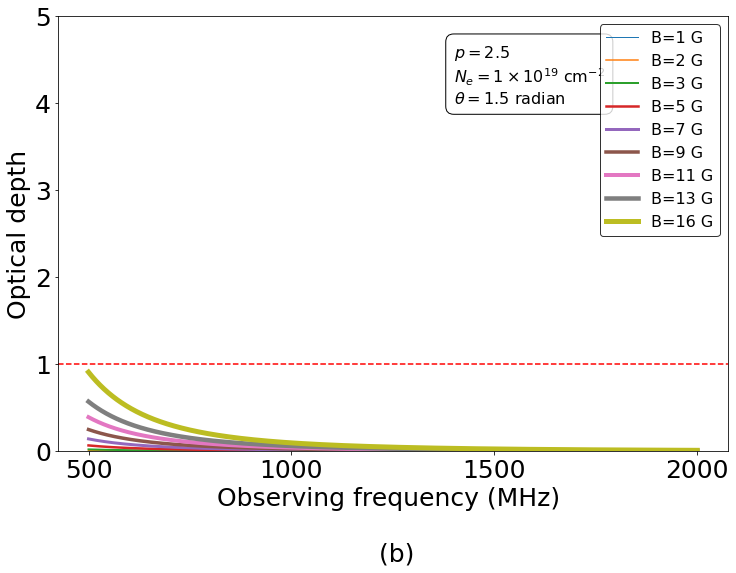

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math
from multiprocessing import Pool, cpu_count

def model_f(args):
    freq, theta, p, B = args
    charge = 4.8032 * 10**(-10)
    lightspeed = 2.99792458 * 10**10
    mass = 9.1094 * 10**(-28)
    vb = (charge * B) / (2 * 3.14 * mass * lightspeed)
    m = freq / vb
    L = 0.7 * 6.957e+10
    Ne = 4 * 10**17
    q = (3 * p + 2) / 12
    r = (3 * p + 22) / 12
    a = math.gamma(q)
    b = math.gamma(r)
    c = (((3 ** ((p + 1) / 2)) * a * b) / 4)
    d = math.sin(theta)
    t = (d / m) ** ((p + 2) / 2)
    no = (Ne / L) * 0.01
    opticaldepth = c * t * ((no * (charge ** 2) * L) / (mass * lightspeed * freq))
    return opticaldepth

def compute_model_f(params_list):
    num_cores = cpu_count()  # Get the number of available cores
    with Pool(processes=num_cores) as pool:
        results = pool.map(model_f, params_list, chunksize=1)
    return results

if __name__ == "__main__":
    freq = np.arange(500 * 10**6, 2000 * 10**6, 500)
    theta = 0.05
    p = 2.5
    B_values = [10,20,30,50,70,90,11,13,16]
    
    params_list = [(freq, theta, p, B) for B in B_values]

    results = compute_model_f(params_list)

    fig, axb = plt.subplots(figsize=(12, 8))
    axb.set_xticks([500,1000,1500,2000])
    axb.set_xlabel("Observing frequency (MHz) \n \n (b)", fontsize=25)
    #axb.set_xlabel("(b)", fontsize=15, labelpad=20)
    axb.set_ylabel("Optical depth", fontsize=25)
    axb.tick_params(axis='both', labelsize=25)

    labels = [f'B={B} G' for B in B_values]
    
    max_linewidth = 5  # Maximum line width for the thickest line
    min_linewidth = 1  # Minimum line width for the thinnest line
    linewidths = np.linspace(min_linewidth, max_linewidth, len(B_values))  # Line thicknesses

    for result, label, lw in zip(results, labels, linewidths):
        axb.plot(freq / 10**6, result, label=label, linewidth=lw)

    axb.axhline(y=1, color='r', linestyle='dashed')
    axb.set_ylim(0, 5)
    
    axb.text(
    1400, 4.0,
    r"$p = 2.5$" "\n" r"$N_e = 1 \times 10^{19}\ \mathrm{cm}^{-2}$" "\n" r"$\theta = 1.5\ \mathrm{radian}$",
    fontsize=16,
    color='black',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

    leg = axb.legend(loc='upper right', fontsize=16)
    leg.get_frame().set_linewidth(1.0)
    leg.get_frame().set_edgecolor('black')

    plt.show()


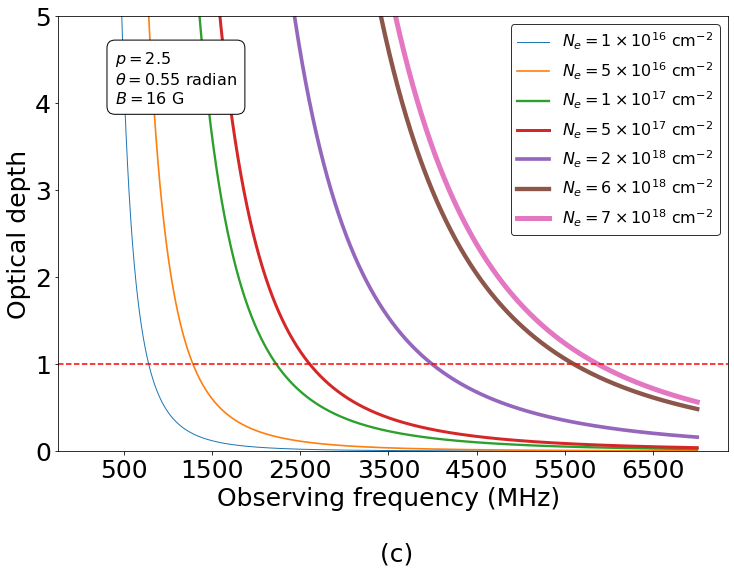

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math
from multiprocessing import Pool, cpu_count

def model_f(args):
    freq, theta, p, Ne = args
    charge = 4.8032 * 10**(-10)
    lightspeed = 2.99792458 * 10**10
    mass = 9.1094 * 10**(-28)
    m = freq / (44 * 10**6)  # corresponds to B=16 Gauss
    L = 2.3 * 6.957e+10
    q = (3 * p + 2) / 12
    r = (3 * p + 22) / 12
    a = math.gamma(q)
    b = math.gamma(r)
    c = (((3 ** ((p + 1) / 2)) * a * b) / 4)
    d = math.sin(theta)
    t = (d / m) ** ((p + 2) / 2)
    no = (Ne / L) * 0.01
    opticaldepth = c * t * ((no * (charge ** 2) * L) / (mass * lightspeed * freq))
    return opticaldepth

def compute_model_f(params_list):
    num_cores = cpu_count()  # Get the number of available cores
    with Pool(processes=num_cores) as pool:
        results = pool.map(model_f, params_list, chunksize=1)
    return results

if __name__ == "__main__":
    freq = np.arange(100 * 10**6, 7000 * 10**6, 500)
    theta = 0.55
    p = 2.5
    Ne_values = [1 * 10**16, 5 * 10**16, 3 * 10**17, 5 * 10**17, 2 * 10**18, 6 * 10**18, 7 * 10**18]
    
    params_list = [(freq, theta, p, Ne) for Ne in Ne_values]

    results = compute_model_f(params_list)

    fig, axn = plt.subplots(figsize=(12, 8))
    axn.set_xticks([500,1500,2500,3500,4500,5500,6500])
    axn.set_xlabel("Observing frequency (MHz) \n \n (c)", fontsize=25)
    #axn.set_xlabel("(c)", fontsize=15, labelpad=20)
    axn.set_ylabel("Optical depth", fontsize=25)

    axn.tick_params(axis='both', labelsize=25)

    labels = [
        r'$N_{e}= 1 \times 10^{16} \ \mathrm{{cm}}^{{-2}}$',
        r'$N_{e}= 5 \times 10^{16} \ \mathrm{{cm}}^{{-2}}$',
        r'$N_{e}= 1 \times 10^{17} \ \mathrm{{cm}}^{{-2}}$',
        r'$N_{e}= 5 \times 10^{17} \ \mathrm{{cm}}^{{-2}}$',
        r'$N_{e}= 2 \times 10^{18} \ \mathrm{{cm}}^{{-2}}$',
        r'$N_{e}= 6 \times 10^{18} \ \mathrm{{cm}}^{{-2}}$',
        r'$N_{e}= 7 \times 10^{18} \ \mathrm{{cm}}^{{-2}}$'
    ]
    
    max_linewidth = 5  # Maximum line width for the thickest line
    min_linewidth = 1  # Minimum line width for the thinnest line
    linewidths = np.linspace(min_linewidth, max_linewidth, len(Ne_values))  # Line thicknesses

    for result, label, lw in zip(results, labels, linewidths):
        axn.plot(freq / 10**6, result, label=label, linewidth=lw)

    axn.axhline(y=1, color='r', linestyle='dashed')
    axn.set_ylim(0, 5)
    
    axn.text(
    400, 4.0,
    r"$p = 2.5$" "\n" r"$\theta = 0.55\ \mathrm{radian}$" "\n" r"$B = 16\ \mathrm{G}$",
    fontsize=16,
    color='black',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)


    leg = axn.legend(loc='upper right', fontsize=16)
    leg.get_frame().set_linewidth(1.0)
    leg.get_frame().set_edgecolor('black')

    plt.show()
